### Statistical Moments - Skewness and Kurtosis

In [51]:
import matplotlib.pyplot as plt
import numpy as np
import yfinance as yf
import scipy.stats as stats
import seaborn as sns

sns.set_theme()

A distribution is symmetric if the parts on either side of the mean are mirror images of each other. The normal distribution is symmetric for example. The normal distribution with the mean $\mu$ and standard deviation $\sigma$ is defined as

$f(x) = \frac{1}{\sigma \sqrt{2 \pi}} e^{-\frac{(x - \mu)^2}{2 \sigma^2}}$

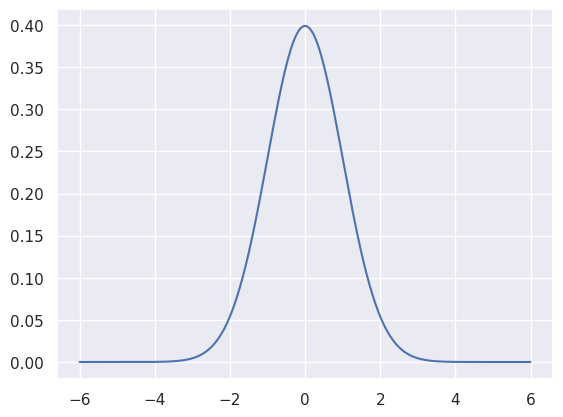

In [3]:
# Plot a normal distribution with mean = 0 and standard deviation = 2
xs = np.linspace(-6, 6, 300)
normal = stats.norm.pdf(xs)
plt.plot(xs, normal);

A distribution which is not symmetric is called skewed. For instance, a distribution can have many small positive and a few large negative values (negatively skewed) or vice versa (positively skewed), and still have a mean of 0. A symmetric distribution has skewness 0. 

$S_K = \frac{n}{(n-1)(n-2)} \frac{\sum_{i=1}^n (X_i - \mu)^3}{\sigma^3}$

where $n$ is the number of observations, $\mu$ is the arithmetic mean, and $\sigma$ is the standard deviation.  

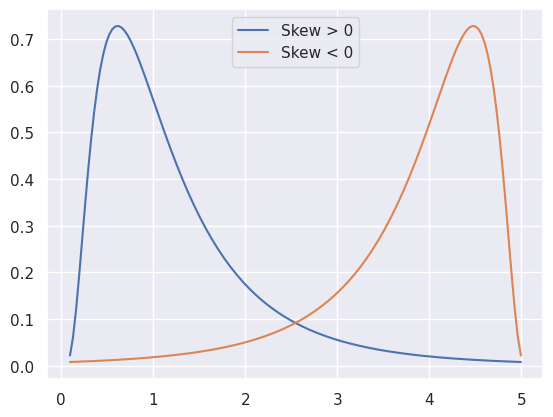

In [4]:
# Generate x-values for which we will plot the distribution
xs2 = np.linspace(stats.lognorm.ppf(0.01, .7, loc=-.1), stats.lognorm.ppf(0.99, .7, loc=-.1), 150)

# Negatively skewed distribution
lognormal = stats.lognorm.pdf(xs2, .7)
plt.plot(xs2, lognormal, label='Skew > 0')

# Positively skewed distribution
plt.plot(xs2, lognormal[::-1], label='Skew < 0')
plt.legend();

Although skew is less obvious when graphing discrete data sets, we can still compute it. Example with S&P 500 returns 2012-2014.

[*********************100%%**********************]  1 of 1 completed

Skew: -0.19166040529417763
Mean: 0.0006617279308062455
Median: 0.0006588129971369927


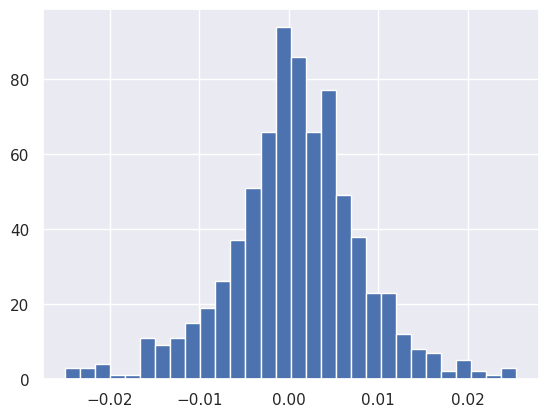

In [5]:
start = '2012-01-01'
end = '2015-01-01'
pricing = yf.download('^GSPC', start=start, end=end)['Adj Close']
returns = pricing.pct_change()[1:]

print('Skew:', stats.skew(returns))
print('Mean:', np.mean(returns))
print('Median:', np.median(returns))

plt.hist(returns, 30);

### Kurtosis

Kurtosis attempts to measure the shape of the deviation from the mean. All normal distributions, regardless of mean and variance, have a kurtosis of 3.

Excess kurtosis of leptokurtic distribution: 3.0
Excess kurtosis of mesokurtic distribution: 0.0
Excess kurtosis of platykurtic distribution: -0.5937628755982794


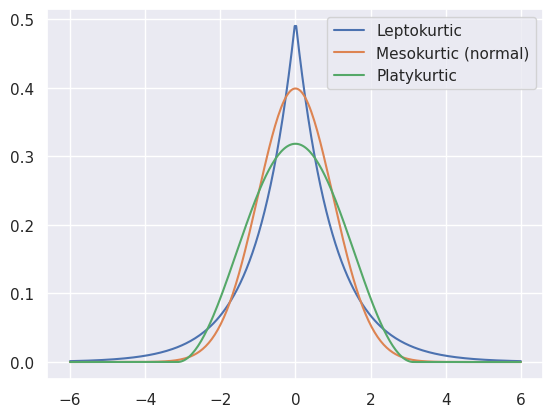

In [6]:
# Plot some example distributions
plt.plot(xs, stats.laplace.pdf(xs), label='Leptokurtic')
print('Excess kurtosis of leptokurtic distribution:', stats.laplace.stats(moments='k'))
plt.plot(xs, normal, label='Mesokurtic (normal)')
print('Excess kurtosis of mesokurtic distribution:', stats.norm.stats(moments='k'))
plt.plot(xs, stats.cosine.pdf(xs), label='Platykurtic')
print('Excess kurtosis of platykurtic distribution:', stats.cosine.stats(moments='k'))
plt.legend();

We can use `scipy` to find the excess kurtosis of the S&P 500 returns from before. 

In [7]:
print('Excess kurtosis of returns', stats.kurtosis(returns))

Excess kurtosis of returns 1.1660178277737634


### Other standardized moments
it's no coincidence that the variance, skewness, and kurtosis take similar forms. They are the first and most important standardized moments, of which the `k`th has the form:

$\frac{E[(X - E[X])^k]}{\sigma^k}$

The first standardized moment is always 0 ($(E[X - E[X]] = E[X] - E[E[X]] = 0)$), so we can only care about the second through fourth. All of the standardized moments are dimensionless numbers which describe the distribution, and in particular can be used to quantify how close to normal a distribution is.

### Normality Testing using Jarque-Bera

The Jarque-Bera test is a common statistical test that compares whether sample data has skewness and kurtosis similar to a normal distribution. We can run it here on the S&P 500 returns to find the p-value for them coming from a normal distribution.
The Jarque-Bera test's null hypotesis is that the data came from a normal distribution. Remember to treat p-values as binary and not try to read into them or compare them. We'll use a cutoff of 0.05 for our p-value.

### Test calibration

In [8]:
from statsmodels.stats.stattools import jarque_bera

N = 1000
M = 1000

pvalues = np.ndarray((N))

for i in range(N):
    # Draw M samples from a normal distribution
    X = np.random.normal(0, 1, M);
    _, pvalue, _, _ = jarque_bera(X)
    pvalues[i] = pvalue

# Count number of pvalues below our default 0.05 cutoff
num_significant = len(pvalues[pvalues < 0.05])

print(float(num_significant) / N)



0.05


Great, if properly calibrated we should expect to be wrong of the time at a 0.05 significance level, and this is pretty close. This means that the test is working as we expect.

In [17]:
_, pvalue, _, _ = jarque_bera(returns)

if pvalue > 0.05:
    print('The returns are likely normal.')
else:
    print('The returns are likely not normal.')

The returns are likely not normal.


This tells us that the S$P 500 returns likely do not follow a normal distribution.

### Exercises

In [52]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
from statsmodels.stats.stattools import jarque_bera

In [53]:
# Use stats.skew function to determine the skew of the distributions.
xs2 = np.linspace(stats.gamma.ppf(0.01, 0.7, loc=-1), stats.gamma.ppf(0.99, 0.7, loc=-1), 150) + 1

X = stats.gamma.pdf(xs2, 1.5)

stats.skew(X)

0.26474831096388496

In [61]:
start = '2015-01-01'
end = '2016-01-01'
pricing = yf.download('NFLX', start=start, end=end)['Adj Close']
returns = pricing.pct_change()[1:]

print('Skew:', stats.skew(returns))

[*********************100%%**********************]  1 of 1 completed

Skew: 1.8460554584124012


In [79]:
# Use stats.kurtosis function to determine the excess kurtosis of the distributions.
xs = np.linspace(-6,6, 300) + 2 

Y = stats.cosine.pdf(xs)

print('Excess kurtosis of the distribution:', stats.kurtosis(Y))

Excess kurtosis of the distribution: -0.6344720164161468


In [80]:
start = '2015-01-01'
end = '2016-01-01'
pricing = yf.download('NFLX', start=start, end=end)['Adj Close']
returns = pricing.pct_change()[1:]

print('Excess kurtosis of NFLX returns', stats.kurtosis(returns))

[*********************100%%**********************]  1 of 1 completed

Excess kurtosis of NFLX returns 9.608733458788484


In [83]:
xs2 = np.linspace(stats.lognorm.ppf(0.01, 0.7, loc=-.1), stats.lognorm.ppf(0.99, 0.7, loc=-.1), 150)

lognorm = stats.lognorm.pdf(xs2, 0.4)

Z = lognorm/2 + lognorm[::-1]

stats.skew(Z)

1.1121491036049673

Ensure that the `jarque-bera` function is calibrated by running it on many trials of simulated data and ensuring that the sample probability that the test returns a result under the p-value is equal to the p-value.

In [111]:
N = 1000
M = 1000

pvalues = np.ndarray((N))

for i in range(N):
    # Draw M samples from a normal distribution 
    X = np.random.normal(0, 1, M);
    _, pvalue, _, _ = jarque_bera(X)
    pvalues[i] = pvalue

num_significant = len(pvalues[pvalues < 0.05])

print(float(num_significant) / N)

0.055


In [158]:
# Use the Jarque-Bera function to determine the normality of Z.
_, pvalue, _, _ = jarque_bera(Z)

print(pvalue)
if pvalue > 0.05:
    print('The returns are likely normal.')
else:
    print('The returns are likely not normal.')

1.6768991741743907e-07
The returns are likely not normal.


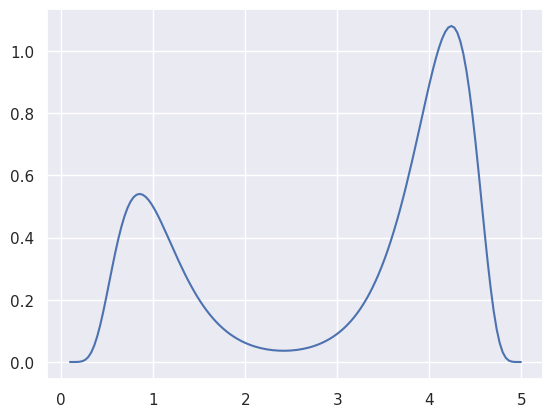

In [121]:
plt.plot(xs2, Z);

#### Bonus

[*********************100%%**********************]  1 of 1 completed

The distribution of the returns seems unimodal and somewhat normal.


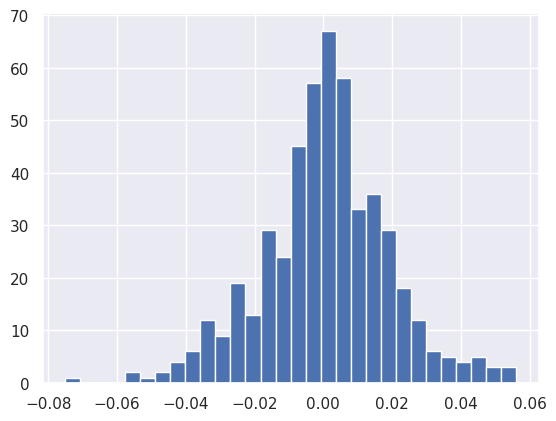

In [132]:
start = '2014-01-01'
end = '2016-01-01'
pricing = yf.download('AMC', start=start, end=end)['Adj Close']
returns = pricing.pct_change()[1:]

plt.hist(returns, 30);
print("The distribution of the returns seems unimodal and somewhat normal.")

In [147]:
print("Skew of the returns: %s" %stats.skew(returns))

Skew of the returns: -0.14272291669270187


[*********************100%%**********************]  1 of 1 completed

Skew of the returns: 1.0294591103442572


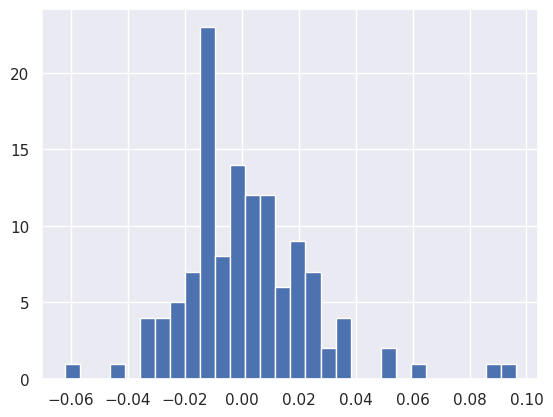

In [151]:
start = '2016-01-01'
end = '2016-07-01'
out_pricing = yf.download('AMC', start=start, end=end)['Adj Close']
out_returns = out_pricing.pct_change()[1:]

plt.hist(out_returns, 30);
print("Skew of the returns: %s" %stats.skew(out_returns))

[*********************100%%**********************]  1 of 1 completed

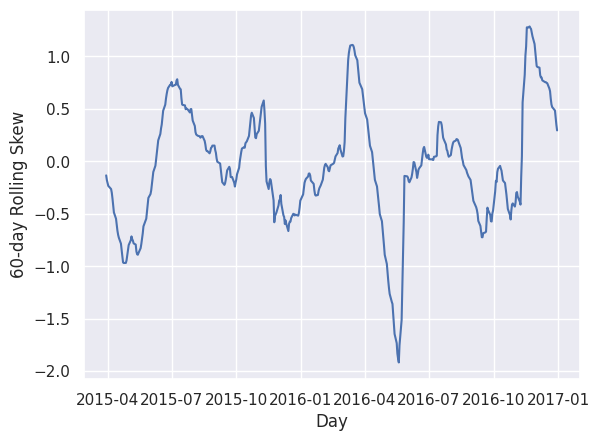

In [161]:
# Plot the rolling skew of AMC using the pd.rolling_skew function.
AMC = yf.download('AMC', start='2015-01-01', end='2017-01-01')['Adj Close']

rolling_skew = AMC.rolling(window=60, center=False).skew()
plt.plot(rolling_skew);
plt.xlabel('Day');
plt.ylabel('60-day Rolling Skew');